In [1]:
#import neccessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [2]:
#load the datasets

df1 = pd.read_csv(r"C:\Users\user\Documents\Data analysis\Amdor\2\Food and nutrition.csv")

df2 = pd.read_csv(r"C:\Users\user\Documents\Data analysis\Amdor\2\Cost of a healthy diet.csv")
df3 = pd.read_csv(r"C:\Users\user\Documents\Data analysis\Amdor\2\Employment in agriculture.csv")

merged_df = pd.merge(df1,df2, on=['Country', 'Item', 'Year', 'Value'], how='outer')

merged_df = pd.merge(merged_df,df3, on=['Country', 'Item', 'Year', 'Value'], how= 'outer')

In [3]:
# Inspect the data

merged_df.head()
merged_df.info()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  150 non-null    object 
 1   Item     150 non-null    object 
 2   Year     150 non-null    int64  
 3   Value    149 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.8+ KB


,Year,Value
count,150.000000,149.000000
mean,2019.500000,642.101418
std,1.713547,1552.241676
min,2017.000000,1.100000
25%,2018.000000,3.420000
50%,2019.500000,14.700000
75%,2021.000000,69.900000
max,2022.000000,5849.100000


In [4]:
#checking for missing values
merged_df.isnull().sum()

Country    0
Item       0
Year       0
Value      1
dtype: int64

In [5]:
# Transposing the dataset for easier analysis

df_trans = merged_df.pivot_table(index =['Country','Year'], columns = 'Item', values = 'Value')
df_trans.reset_index(inplace=True)

# Affordability of a Healthy Diet

In [6]:
# Average cost of a healthy diet in Nigeria and year
country_name = 'Nigeria'
Nigeria = df_trans[df_trans['Country'] == country_name]
Nigeria.groupby('Year')['Cost of a healthy diet (CoHD)'].mean()

Year
2017    2.88
2018    3.01
2019    3.12
2020    3.24
2021    3.49
2022    3.83
Name: Cost of a healthy diet (CoHD), dtype: float64

In [7]:
# Average cost of a healthy diet by country and year

avg_cost_diet = df_trans.groupby(['Country','Year'])['Cost of a healthy diet (CoHD)'].mean()
avg_cost_diet

Country   Year
Benin     2017    2.84
          2018    2.94
          2019    2.93
          2020    2.97
          2021    3.23
          2022    3.42
Cameroon  2017    2.58
          2018    2.65
          2019    2.70
          2020    2.77
          2021    2.95
          2022    3.39
Niger     2017    3.22
          2018    3.17
          2019    3.15
          2020    3.28
          2021    3.56
          2022    3.96
Nigeria   2017    2.88
          2018    3.01
          2019    3.12
          2020    3.24
          2021    3.49
          2022    3.83
Name: Cost of a healthy diet (CoHD), dtype: float64

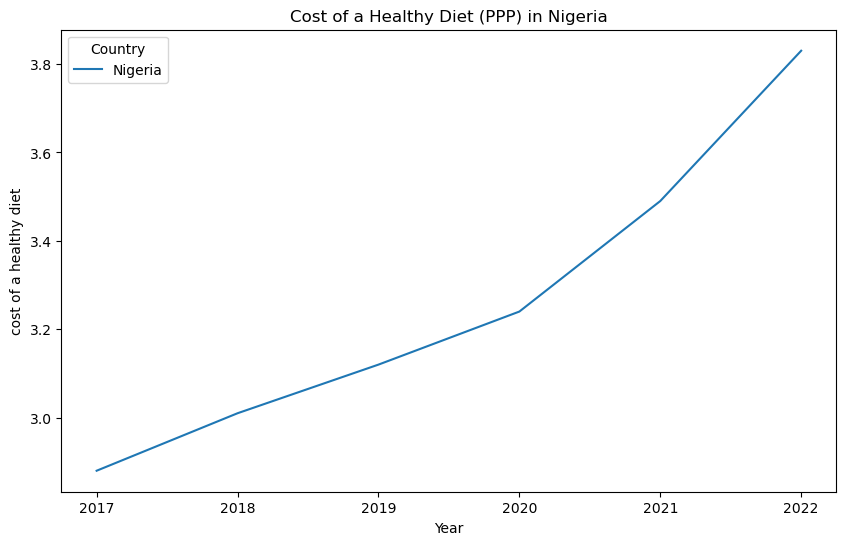

In [8]:
plt.figure(figsize = (10,6))
sns.lineplot(x='Year', y= 'Cost of a healthy diet (CoHD)', hue = 'Country', data=Nigeria)
plt.title('Cost of a Healthy Diet (PPP) in Nigeria')
plt.ylabel('cost of a healthy diet')
plt.show()

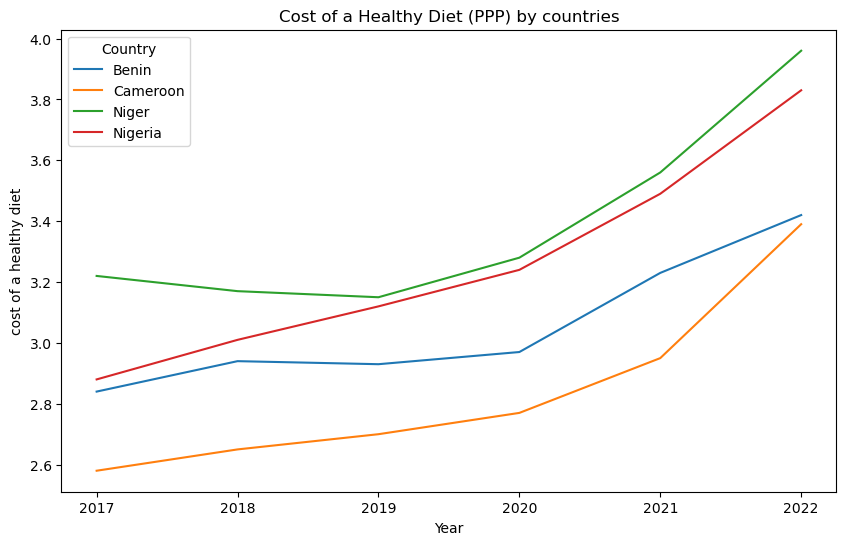

In [9]:
plt.figure(figsize = (10,6))
sns.lineplot(x='Year', y= 'Cost of a healthy diet (CoHD)', hue = 'Country', data=df_trans)
plt.title('Cost of a Healthy Diet (PPP) by countries')
plt.ylabel('cost of a healthy diet')
plt.show()

# The Correlation of Prevalence of Undernourishment and COHD

In [10]:
# Correletion between cost of diet and undernourishment

correlation = Nigeria[['Cost of a healthy diet (CoHD)', 'Prevalence of undernourishment']].corr()
correlation





Item,Cost of a healthy diet (CoHD),Prevalence of undernourishment
Item,,
Cost of a healthy diet (CoHD),1.0000,0.9895
Prevalence of undernourishment,0.9895,1.0000


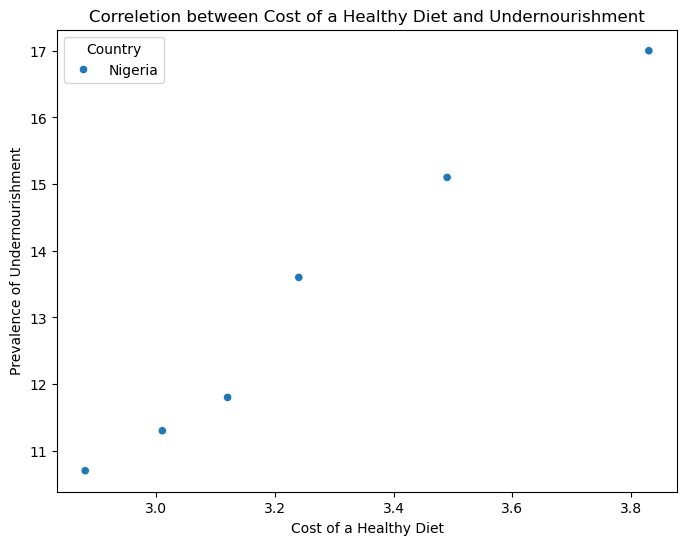

In [11]:
#scatter plot

plt.figure(figsize=(8,6))
sns.scatterplot(x='Cost of a healthy diet (CoHD)', y='Prevalence of undernourishment',hue='Country', data=Nigeria)
plt.title('Correletion between Cost of a Healthy Diet and Undernourishment')
plt.xlabel('Cost of a Healthy Diet')
plt.ylabel('Prevalence of Undernourishment')
plt.show()



# Key Factors Influencing High Food Price

In [12]:
Factors = ['Employment in Agriculture', 'Gross domestic product per capita (PPP)',
           'Prevalence of severe food insecurity in the total population',
           'Cost of a healthy diet (CoHD)']

Nigeria.groupby('Year')[Factors].mean()

Item,Employment in Agriculture,Gross domestic product per capita (PPP),Prevalence of severe food insecurity in the total population,Cost of a healthy diet (CoHD)
Year,,,,
2017,38.509064,5849.1,12.3,2.88
2018,38.606182,5814.6,13.6,3.01
2019,38.594310,5799.3,15.1,3.12
2020,38.782920,5557.9,17.3,3.24
2021,38.553610,5623.7,19.8,3.49
2022,37.985245,5670.0,21.3,3.83


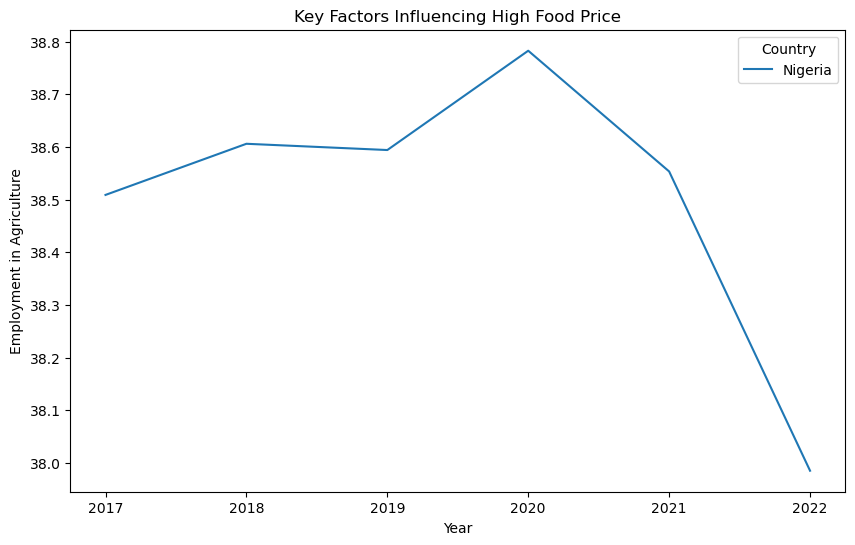

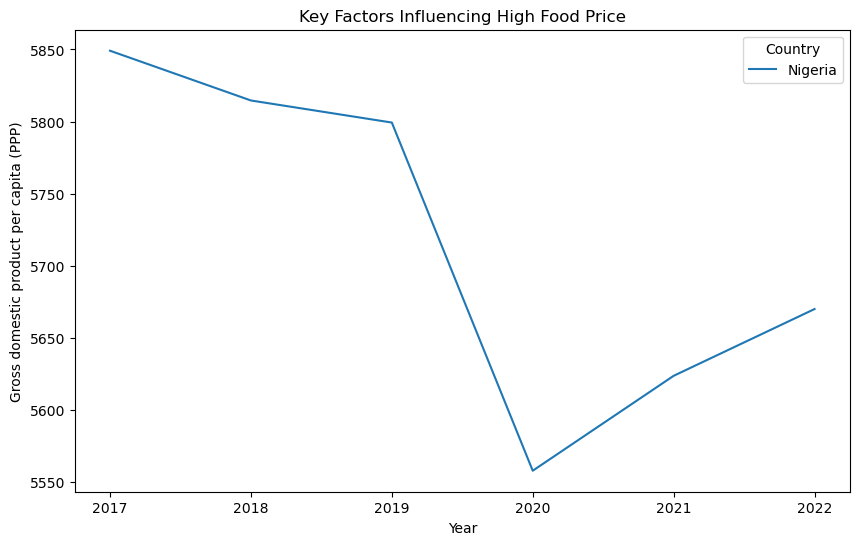

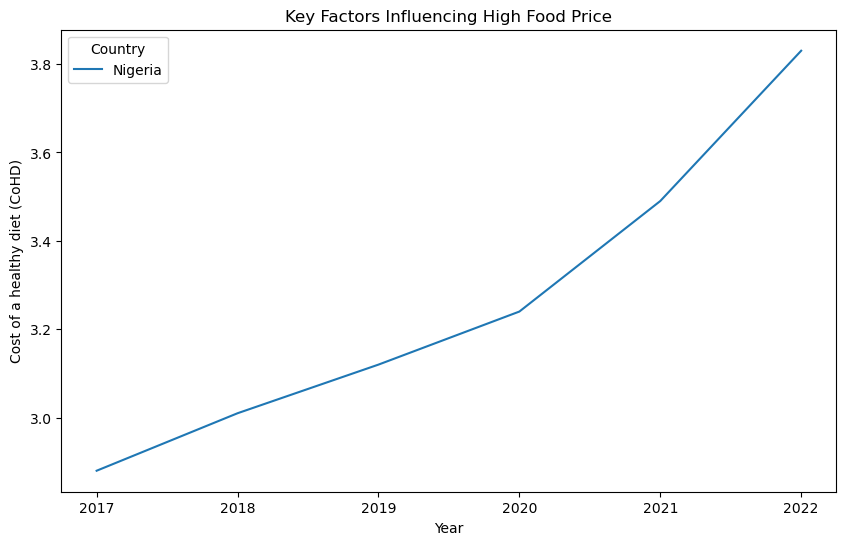

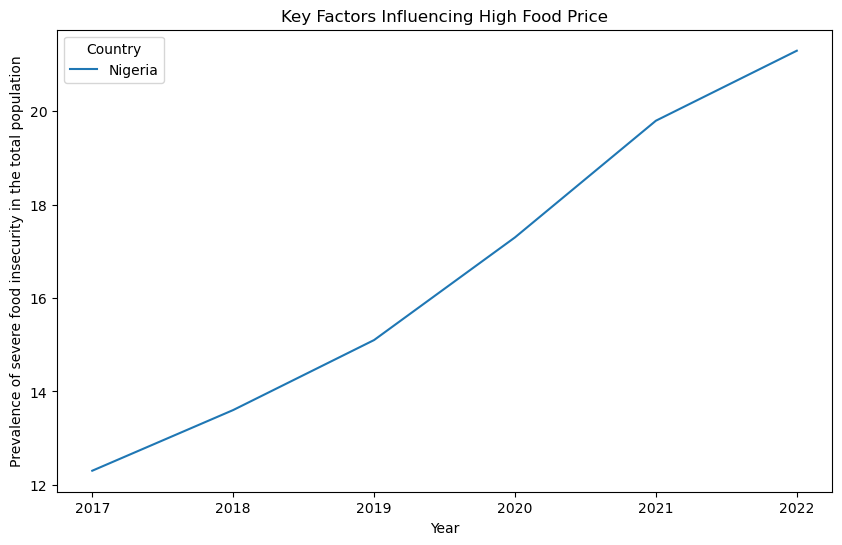

In [13]:
# Trend of the key Factors Influencing High Food Price

plt.figure(figsize = (10,6))
sns.lineplot(x='Year', y= 'Employment in Agriculture', hue = 'Country', data=Nigeria)
plt.title('Key Factors Influencing High Food Price')
plt.show()

plt.figure(figsize = (10,6))
sns.lineplot(x='Year', y= 'Gross domestic product per capita (PPP)', hue = 'Country', data=Nigeria)
plt.title('Key Factors Influencing High Food Price')
plt.show()

plt.figure(figsize = (10,6))
sns.lineplot(x='Year', y= 'Cost of a healthy diet (CoHD)', hue = 'Country', data=Nigeria)
plt.title('Key Factors Influencing High Food Price')
plt.show()

plt.figure(figsize = (10,6))
sns.lineplot(x='Year', y= 'Prevalence of severe food insecurity in the total population', hue = 'Country', data=Nigeria)
plt.title('Key Factors Influencing High Food Price')
plt.show()


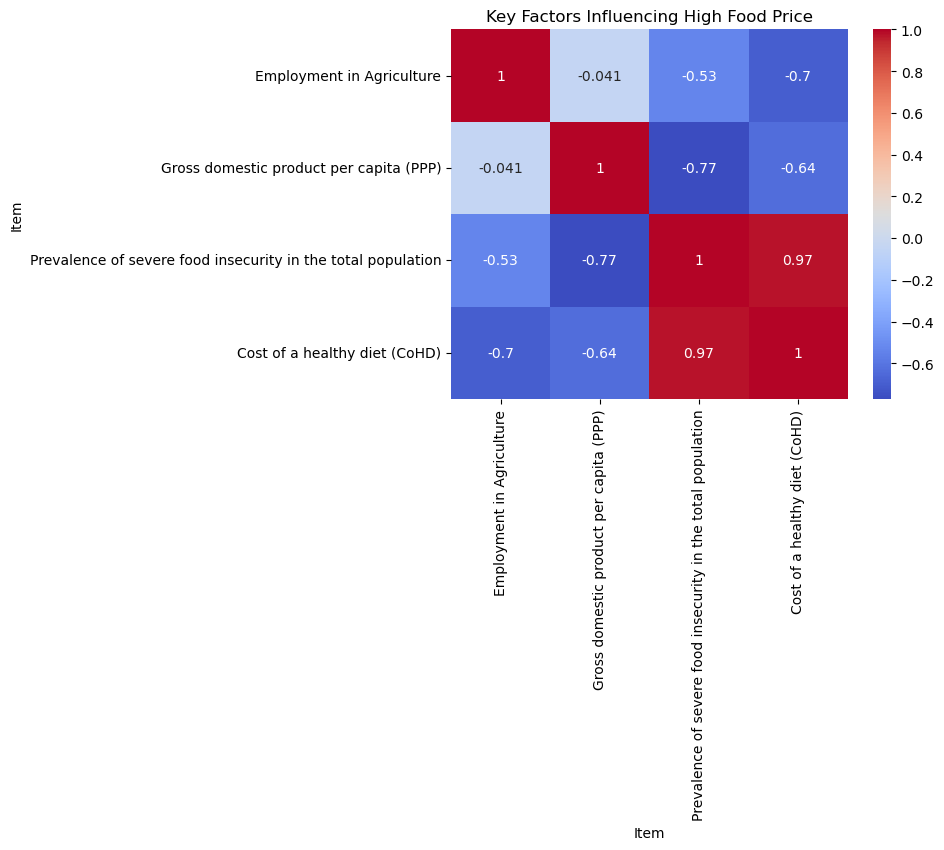

In [14]:
factors_corr = Nigeria[Factors].corr()
factors_corr

sns.heatmap(factors_corr, annot=True, cmap= 'coolwarm')

plt.title('Key Factors Influencing High Food Price')


matplotlib.rcParams['figure.figsize'] = (12,6)

plt.show()

# Healthy Implication

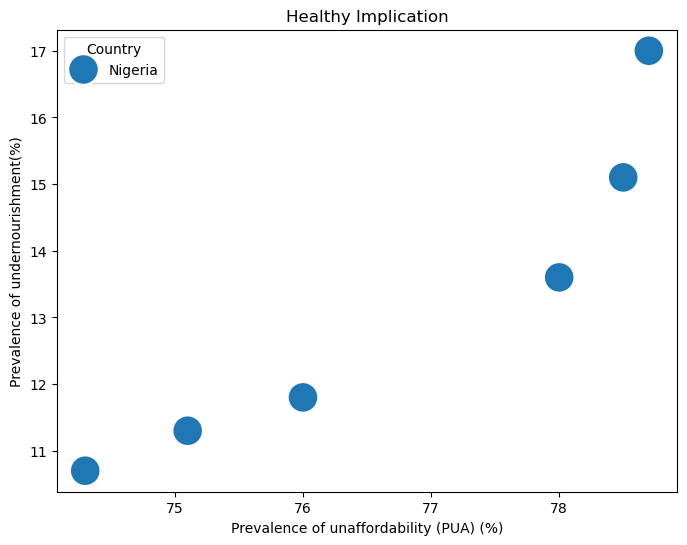

In [15]:
# Scatterplot for Unaffordability vs Undernourishment

plt.figure(figsize=(8,6))
sns.scatterplot(x= 'Prevalence of unaffordability (PUA)', y= 'Prevalence of undernourishment', hue= 'Country', data= Nigeria, s=500)
plt.title('Healthy Implication')
plt.xlabel('Prevalence of unaffordability (PUA) (%)')
plt.ylabel('Prevalence of undernourishment(%)')
plt.show()

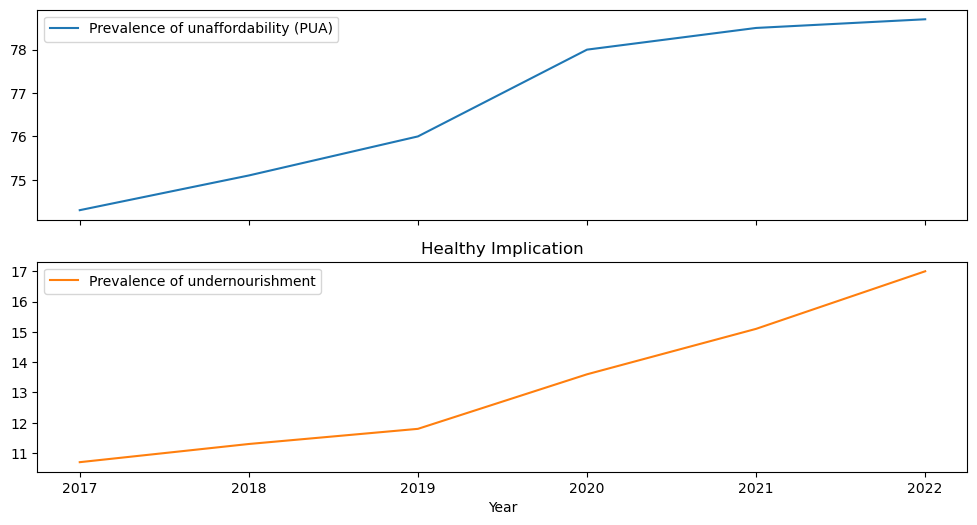

In [16]:
Nigeria.plot(x='Year', y= ['Prevalence of unaffordability (PUA)', 'Prevalence of undernourishment'], subplots= True)
plt.title('Healthy Implication')
plt.show()

# Analysis on Employment

C:\Users\user\AppData\Local\Temp\ipykernel_11564\4221325293.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:Green'` for the same effect.

  sns.boxplot(x='Year', y= 'Cost of a healthy diet (CoHD)', hue='Employment in Agriculture', data=Nigeria, linewidth=3, linecolor='Green', color='Green')


<Axes: xlabel='Year', ylabel='Cost of a healthy diet (CoHD)'>

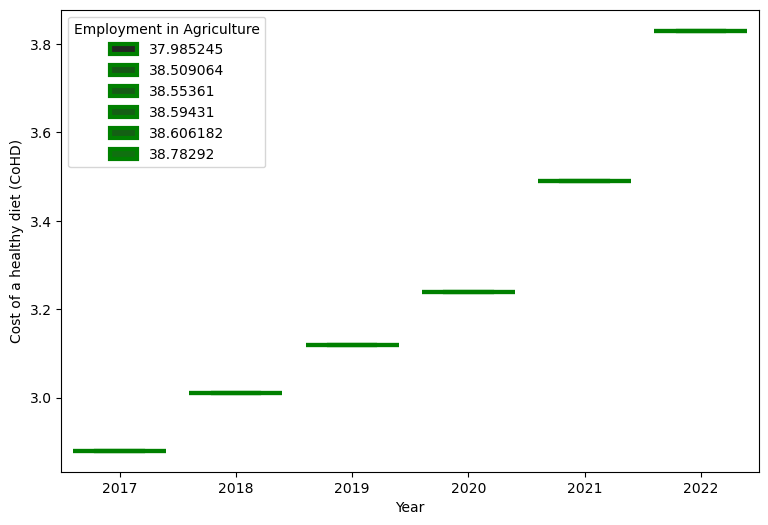

In [17]:
# Employment in Agriculture with diet cost and affordability

plt.figure(figsize=(9,6))
sns.boxplot(x='Year', y= 'Cost of a healthy diet (CoHD)', hue='Employment in Agriculture', data=Nigeria, linewidth=3, linecolor='Green', color='Green')


# Year when the Cost of a Healthy Diet is above the avgerage

In [18]:
high_food_cost = Nigeria[Nigeria['Cost of a healthy diet (CoHD)'] > Nigeria['Cost of a healthy diet (CoHD)'].mean()]
print(high_food_cost[['Year','Cost of a healthy diet (CoHD)']],round(Nigeria['Cost of a healthy diet (CoHD)'].mean(),2), 'THE MEAN')

Item  Year  Cost of a healthy diet (CoHD)
22    2021                           3.49
23    2022                           3.83 3.26 THE MEAN


In [33]:
# saving results to csv
df_trans.to_csv('Documents/Impact of food on health.csv', index = False)